In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

df = pd.read_csv("./Tweets.csv")


In [ ]:
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.columns


Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
tweet_df = df[['text','airline_sentiment']]
print(tweet_df.shape)
tweet_df.head(5)


(9155, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
tweet_df = tweet_df[tweet_df['airline_sentiment'] != 'neutral']
print(tweet_df.shape)
tweet_df.head(5)


(6860, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [ ]:
tweet_df["airline_sentiment"].value_counts()


negative    5084
positive    1776
Name: airline_sentiment, dtype: int64

In [ ]:
sentiment_label = tweet_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 1, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [ ]:
tweet = tweet_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
print(tokenizer.word_index)


{'to': 1, 'united': 2, 'the': 3, 'i': 4, 'a': 5, 'you': 6, 'for': 7, 'flight': 8, 'and': 9, 'southwestair': 10, 'on': 11, 'jetblue': 12, 'my': 13, 'is': 14, 'in': 15, 'of': 16, 'your': 17, 'it': 18, 'me': 19, 'was': 20, 'not': 21, 'with': 22, 'that': 23, 'no': 24, 'at': 25, 'have': 26, 'this': 27, 'but': 28, 'be': 29, 'thanks': 30, 'get': 31, 'now': 32, 'we': 33, 'from': 34, 'just': 35, 'are': 36, 't': 37, 'co': 38, 'service': 39, 'so': 40, 'cancelled': 41, 'http': 42, 'an': 43, 'time': 44, '2': 45, 'customer': 46, 'been': 47, 'thank': 48, 'can': 49, 'they': 50, "i'm": 51, 'up': 52, 'out': 53, 'virginamerica': 54, 'do': 55, 'will': 56, 'our': 57, 'why': 58, 'amp': 59, 'help': 60, 'plane': 61, 'delayed': 62, 'all': 63, 'hours': 64, 'had': 65, 'flights': 66, 'still': 67, 'one': 68, 'when': 69, 'what': 70, 'bag': 71, 'would': 72, 'gate': 73, 'us': 74, 'if': 75, "can't": 76, 'how': 77, 'as': 78, 'about': 79, 'hour': 80, 'hold': 81, 'after': 82, 'airline': 83, "it's": 84, 'there': 85, 'has'

In [ ]:
print(tweet[0])
print(encoded_docs[0])


@VirginAmerica plus you've added commercials to the experience... tacky.
[54, 472, 514, 1133, 2013, 1, 3, 169, 4284]


In [ ]:
print(padded_sequence[0])


[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0   54  472  514 1133 2013
    1 

In [ ]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           319968    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 336619 (1.28 MB)
Trainable params: 336619 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)


Epoch 1/5
172/172 [==============================] - 61s 336ms/step - loss: 0.4680 - accuracy: 0.7939 - val_loss: 0.3959 - val_accuracy: 0.8192
Epoch 2/5
172/172 [==============================] - 41s 236ms/step - loss: 0.2856 - accuracy: 0.8912 - val_loss: 0.2999 - val_accuracy: 0.8783
Epoch 3/5
172/172 [==============================] - 43s 248ms/step - loss: 0.2017 - accuracy: 0.9251 - val_loss: 0.2734 - val_accuracy: 0.8929
Epoch 4/5
172/172 [==============================] - 41s 241ms/step - loss: 0.1627 - accuracy: 0.9401 - val_loss: 0.2703 - val_accuracy: 0.8848
Epoch 5/5
172/172 [==============================] - 41s 239ms/step - loss: 0.1225 - accuracy: 0.9563 - val_loss: 0.3011 - val_accuracy: 0.8899


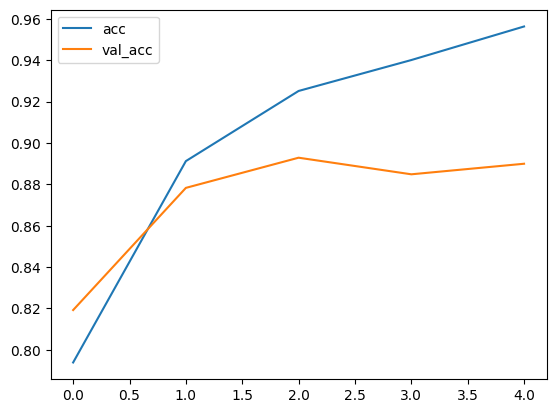

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")



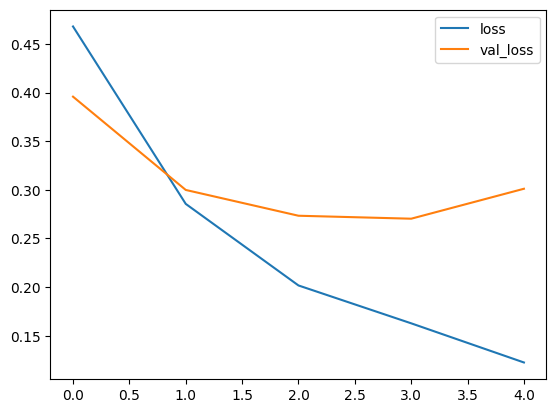

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])



In [ ]:
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)


1/1 [==============================] - 0s 287ms/step
Predicted label:  positive
1/1 [==============================] - 0s 36ms/step
Predicted label:  negative
